<a href="https://colab.research.google.com/github/archajoshy/Advanced-Computing-Lab/blob/main/Experiment%2011/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_dir="/content/drive/MyDrive/casting_data/data/train"
test_dir="/content/drive/MyDrive/casting_data/data/test"
valid_dir="/content/drive/MyDrive/casting_data/data/val"

In [13]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)

Found 3192 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


In [22]:
model_1=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")                                                                               
                                    
])

In [23]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

In [24]:
history=model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=int(len(train_data)/32),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Epoch 1/5
3/3 [==============================] - 26s 8s/step - loss: 0.6528 - accuracy: 0.7500 - val_loss: 0.6319 - val_accuracy: 0.7236
Epoch 2/5
3/3 [==============================] - 30s 10s/step - loss: 0.5979 - accuracy: 0.7708 - val_loss: 0.5963 - val_accuracy: 0.7236
Epoch 3/5
3/3 [==============================] - 29s 10s/step - loss: 0.6033 - accuracy: 0.6979 - val_loss: 0.5829 - val_accuracy: 0.7236
Epoch 4/5
3/3 [==============================] - 28s 10s/step - loss: 0.5986 - accuracy: 0.7083 - val_loss: 0.5844 - val_accuracy: 0.7236
Epoch 5/5
3/3 [==============================] - 28s 10s/step - loss: 0.5284 - accuracy: 0.7708 - val_loss: 0.5917 - val_accuracy: 0.7236


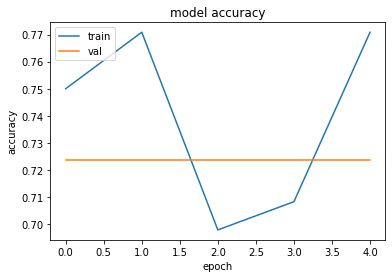

In [25]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

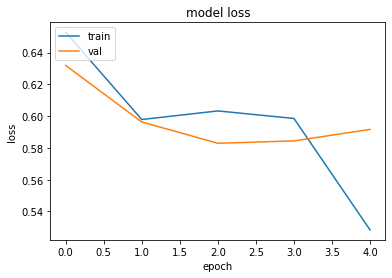

In [28]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


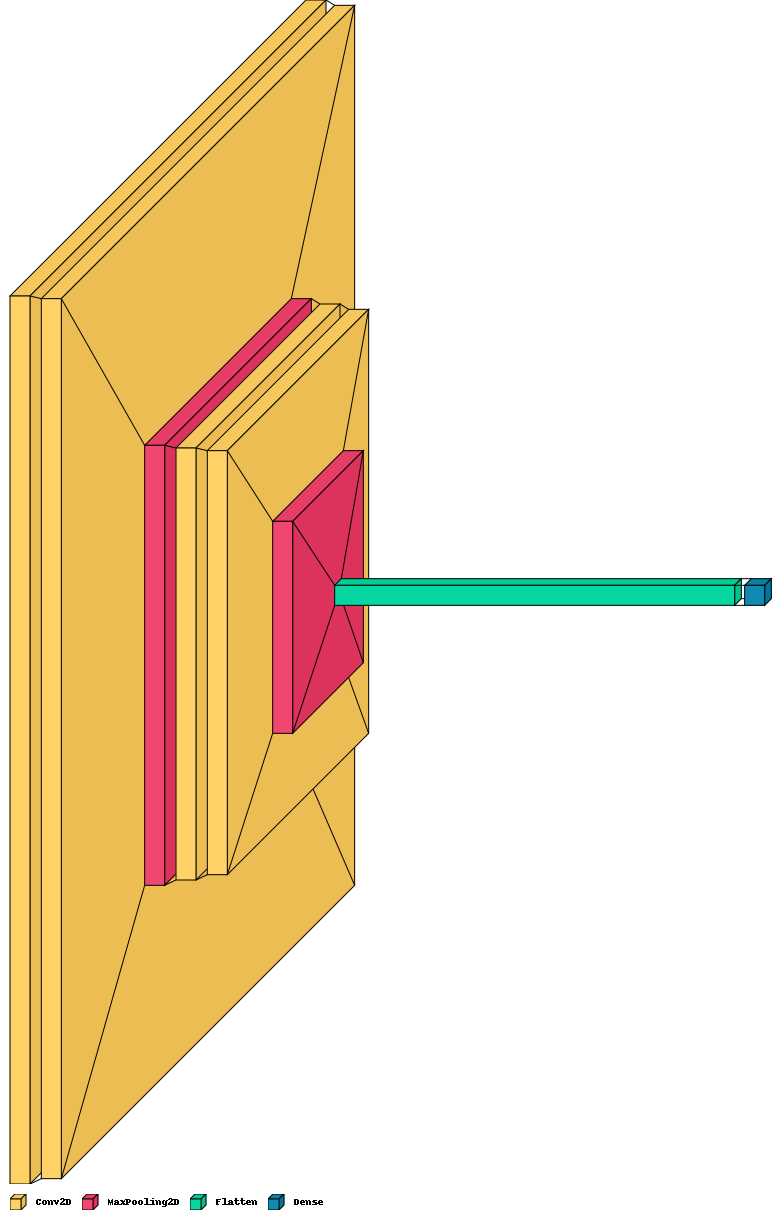

In [27]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)

In [29]:
from tensorflow.keras.preprocessing import image

In [30]:
import numpy as np

In [31]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))

  plt.imshow(img1)

  Y=image.img_to_array(img1)

  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  print(val)
  if val ==1:
    plt.xlabel("def_front",fontsize=30)
  elif val ==0:
    plt.xlabel("ok_front",fontsize=30)  


[[1.]]


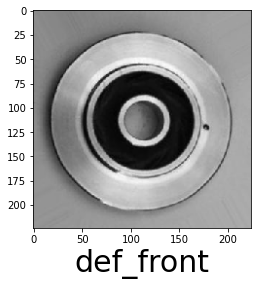

In [33]:
predictImage("/content/drive/MyDrive/casting_data/data/test/def_front/cast_def_0_1085.jpeg")